In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/base_dir.zip'

# Destination directory to extract the zip file contents
extract_dir = '/content/extracted_data'

# Import necessary libraries
import zipfile
import os

# Create the destination directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

Extracted files: ['base_dir']


In [ ]:

# Save the extracted files to Google Drive
save_dir = '/content/drive/My Drive/extracted_data'
os.makedirs(save_dir, exist_ok=True)
for file in extracted_files:
    source_file_path = os.path.join(extract_dir, file)
    destination_file_path = os.path.join(save_dir, file)
    if os.path.isdir(source_file_path):  # Check if it's a directory
        shutil.copytree(source_file_path, destination_file_path)  # Use shutil.copytree to copy directories
    else:
        shutil.copy(source_file_path, destination_file_path)  # Use shutil.copy to copy files
    print(f"Copied '{file}' to Google Drive at '{destination_file_path}'")

Copied 'base_dir' to Google Drive at '/content/drive/My Drive/extracted_data/base_dir'


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
IMAGE_SIZE = [170, 170]

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
!pip install --upgrade keras


In [ ]:
train_path = '/content/extracted_data/base_dir/train_dir'
valid_path = '/content/extracted_data/base_dir/val_dir'

In [ ]:
DenseNet121 = DenseNet121(input_shape=list(IMAGE_SIZE) + [3], weights='imagenet', include_top=False)


In [ ]:

# Parameters
fine_tune_layers = 20  # Number of layers to unfreeze for fine-tuning
learning_rate = 0.001
dropout_rate = 0.5
l2_regularizer = 0.001
batch_size = 32
epochs = 20



In [ ]:
from tensorflow.keras import regularizers  # Add this import statement

# Fine-tune layers
for layer in DenseNet121.layers[-fine_tune_layers:]:
    layer.trainable = True

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Regularization
regularizer = regularizers.l2(l2_regularizer)


In [ ]:
import os
from glob import glob

folders = glob('/content/extracted_data/base_dir/train_dir/*')
class_names = []

# Extract bird names from folder paths
for folder in folders:
    class_name = os.path.basename(folder)
    class_names.append(class_name)

print(class_names)


['bcc', 'df', 'bkl', 'vasc', 'nv', 'mel', 'akiec']


In [ ]:
x = Flatten()(DenseNet121.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=DenseNet121.input, outputs=prediction)

In [ ]:
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data for training
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(170, 170),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names
)

# Generate batches of data for validation
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(170, 170),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names
)


Found 8400 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [ ]:
# Model training
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=epochs,
    callbacks=[lr_scheduler],
    )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


168/168 ━━━━━━━━━━━━━━━━━━━━ 285s 733ms/step - accuracy: 0.3957 - loss: 2.7978 - val_accuracy: 0.0117 - val_loss: 93099.7734 - learning_rate: 0.0010
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 140s 572ms/step - accuracy: 0.4326 - loss: 3.0734 - val_accuracy: 0.7495 - val_loss: 0.8872 - learning_rate: 0.0010
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 98s 567ms/step - accuracy: 0.4141 - loss: 4.0763 - val_accuracy: 0.4893 - val_loss: 2.1751 - learning_rate: 0.0010
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 98s 568ms/step - accuracy: 0.4650 - loss: 2.8902 - val_accuracy: 0.1471 - val_loss: 3.5259 - learning_rate: 0.0010
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 571ms/step - accuracy: 0.5092 - loss: 1.6632 - val_accuracy: 0.1439 - val_loss: 10.2204 - learning_rate: 0.0010
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 159s 669ms/step - accuracy: 0.5046 - loss: 1.7366 - val_accuracy: 0.1514 - val_loss: 3.3466 - learning_rate: 0.0010
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 102s 581ms/step - accuracy: 0.54

In [ ]:
model.save('/content/drive/MyDrive/densent_model.h5')

In [ ]:
# Get the final training accuracy
train_accuracy = history.history['accuracy'][-1]

# Get the final validation accuracy
val_accuracy = history.history['val_accuracy'][-1]

# Convert accuracy to percentage
train_accuracy_percent = train_accuracy * 100
val_accuracy_percent = val_accuracy * 100

# Display the accuracy
print(f"Training Accuracy: {train_accuracy_percent:.2f}%")
print(f"Validation Accuracy: {val_accuracy_percent:.2f}%")


Training Accuracy: 70.23%
Validation Accuracy: 83.80%


19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 823ms/step


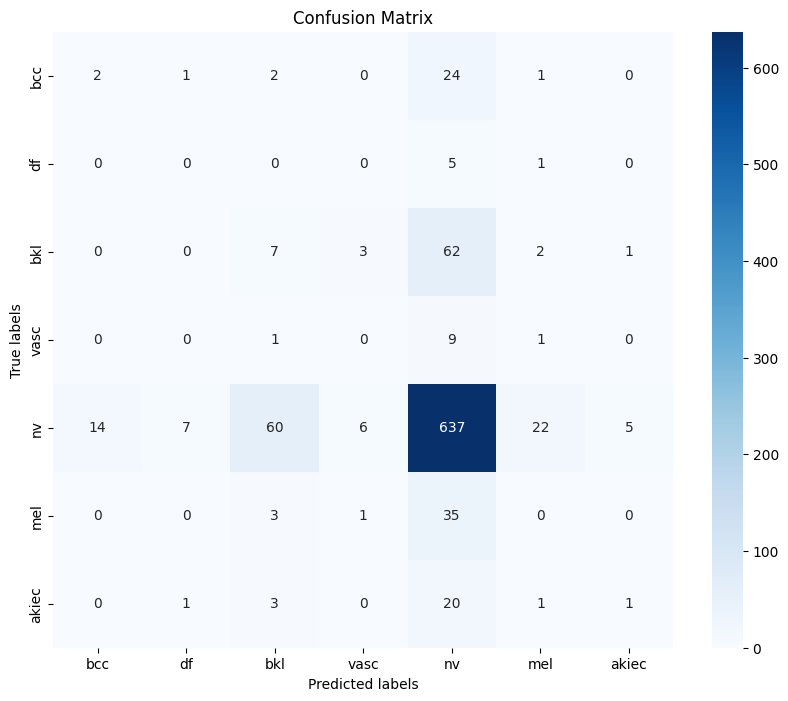

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Predict classes for test set

Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_set.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print precision, recall, and F1-score
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1_score:.2f}')


Precision: 0.66
Recall: 0.69
F1-score: 0.67
